In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

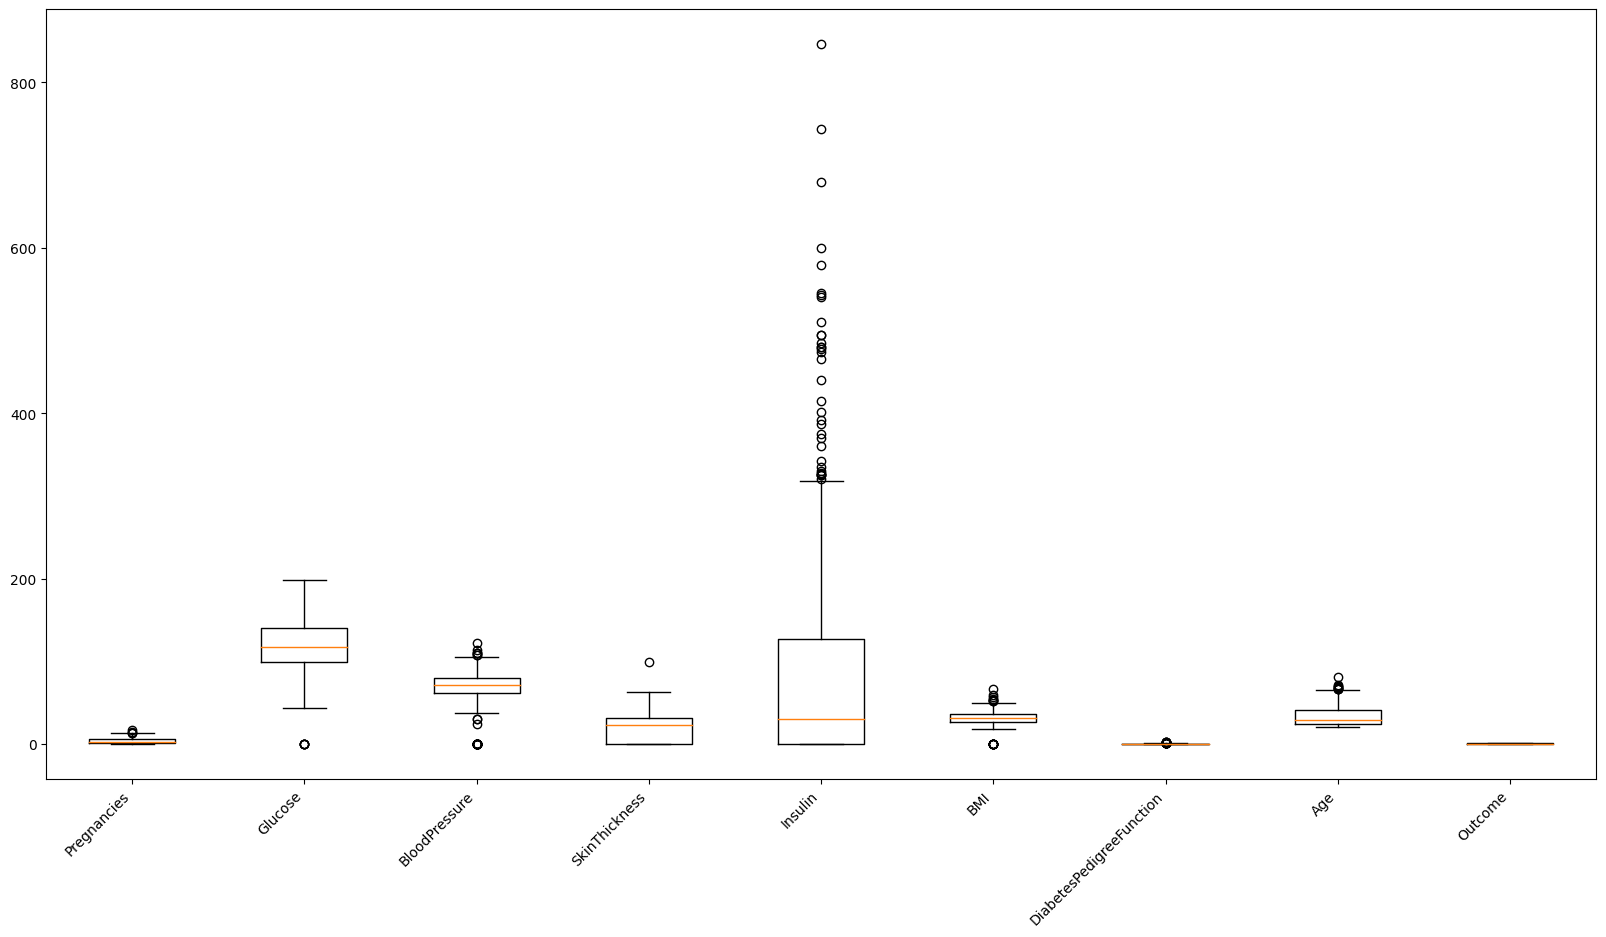

In [ ]:
#평점을 나타낸 feature들에 대해 boxplot으로 표현

fig, ax = plt.subplots(figsize=(20,10))
ax.boxplot(df)
ax.set_xticklabels(df.columns, rotation=45, ha='right')
plt.show()

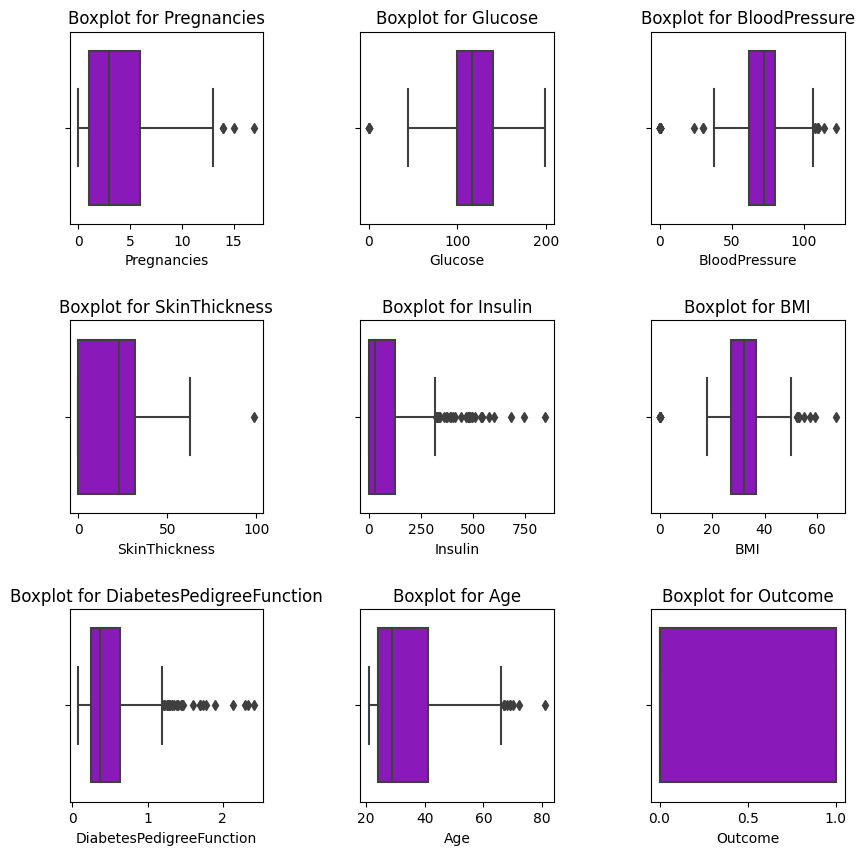

In [ ]:
plt.figure(figsize=(10,10))
plt.subplots_adjust(hspace=0.5, wspace=0.5)

for i, col in enumerate(df.columns):
  plt.subplot(3,3,i+1)
  sns.boxplot(x=df[col], color = 'darkviolet')
  plt.title(f'Boxplot for {col}')

plt.show()

In [ ]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [ ]:
X_data = df.iloc[:,:-1]
y_data = df.iloc[:,-1:]

In [ ]:
X_data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [ ]:
y_data

,Outcome
0,1
1,0
2,1
3,0
4,1
...,...
763,0
764,0
765,0
766,1


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(614, 8) (154, 8)
(614, 1) (154, 1)


In [ ]:
cols =['Glucose','BloodPressure','SkinThickness','Insulin','BMI']

In [ ]:
# 이상치 처리-이상치에 평균 적용
import numpy as np

def impute_zero(data,col):
  df=data.loc[data[col] !=0 , col]
  avg=np.sum(df)/len(df)
  k=len(data.loc[data[col]==0, col])
  data.loc[data[col] ==0, col] = avg
  print('%s : fixed %d, mean: %.3f' %(col,k,avg))

for col in cols:
  impute_zero(X_train, col)

Glucose : fixed 5, mean: 121.847
BloodPressure : fixed 24, mean: 72.239
SkinThickness : fixed 176, mean: 28.596
Insulin : fixed 290, mean: 154.330
BMI : fixed 7, mean: 32.352


In [ ]:
# 테스트 정규화

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)

print(X_train_s[:5])

[[-5.26396861e-01 -1.25832567e+00  0.00000000e+00  4.22787785e-16
   0.00000000e+00  1.02533391e-15 -4.90734790e-01 -1.03594038e+00]
 [ 1.58804586e+00 -3.27397242e-01  8.07407436e-01 -5.46930179e-01
   0.00000000e+00 -5.99178052e-01  2.41502991e+00  1.48710085e+00]
 [-8.28460107e-01  5.70283740e-01 -2.17042447e+00 -1.14195109e+00
  -8.20791983e-01 -5.27026593e-01  5.49160552e-01 -9.48938958e-01]
 [-1.13052335e+00  1.30172750e+00 -1.83955426e+00  4.22787785e-16
   0.00000000e+00 -1.50828644e+00 -6.39291267e-01  2.79212217e+00]
 [ 6.81856121e-01  4.04046521e-01  6.41972330e-01  1.00012419e+00
   2.48169622e+00  1.99827450e+00 -6.86829340e-01  1.13909516e+00]]


In [ ]:
# 넘파이 배열로 타입 변경- 이상치 확인

y_train = y_train.values
y_test=y_test.values

print(type(y_train), type(y_test))

<class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [ ]:
# 모델 만들기

from tensorflow import keras
from tensorflow.keras import layers

def build_model():
  model = keras.Sequential()
  model.add(layers.Dense(12,input_dim=8, activation='relu'))
  model.add(layers.Dense(8, activation='relu'))
  model.add(layers.Dense(1, activation='sigmoid'))
  return model

In [ ]:
model = build_model()
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 12)                108       
                                                                 
 dense_9 (Dense)             (None, 8)                 104       
                                                                 
 dense_10 (Dense)            (None, 1)                 9         
                                                                 
Total params: 221 (884.00 Byte)
Trainable params: 221 (884.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# 모델의 컴파일-binary_crossentropy

model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['acc'])

In [ ]:
# 모델 학습
history = model.fit(X_train_s, y_train, epochs=500, batch_size=16, validation_split=0.2,verbose=2)

Epoch 1/500
31/31 - 1s - loss: 0.6858 - acc: 0.5560 - val_loss: 0.6628 - val_acc: 0.5854 - 1s/epoch - 34ms/step
Epoch 2/500
31/31 - 0s - loss: 0.6396 - acc: 0.6232 - val_loss: 0.6204 - val_acc: 0.6341 - 96ms/epoch - 3ms/step
Epoch 3/500
31/31 - 0s - loss: 0.6046 - acc: 0.6497 - val_loss: 0.5850 - val_acc: 0.6504 - 106ms/epoch - 3ms/step
Epoch 4/500
31/31 - 0s - loss: 0.5765 - acc: 0.6782 - val_loss: 0.5588 - val_acc: 0.6504 - 92ms/epoch - 3ms/step
Epoch 5/500
31/31 - 0s - loss: 0.5557 - acc: 0.7006 - val_loss: 0.5387 - val_acc: 0.6504 - 91ms/epoch - 3ms/step
Epoch 6/500
31/31 - 0s - loss: 0.5398 - acc: 0.7108 - val_loss: 0.5247 - val_acc: 0.6667 - 94ms/epoch - 3ms/step
Epoch 7/500
31/31 - 0s - loss: 0.5266 - acc: 0.7210 - val_loss: 0.5138 - val_acc: 0.6829 - 106ms/epoch - 3ms/step
Epoch 8/500
31/31 - 0s - loss: 0.5148 - acc: 0.7434 - val_loss: 0.5030 - val_acc: 0.6992 - 97ms/epoch - 3ms/step
Epoch 9/500
31/31 - 0s - loss: 0.5037 - acc: 0.7556 - val_loss: 0.4952 - val_acc: 0.7154 - 95ms

In [ ]:
# 학습곡선 그리기

import matplotlib.pyplot as plt

def plot_history(history):
  hist=pd.DataFrame(history.history)
  hist['epoch']=history.epoch

  plt.figure(figsize=(16,8))
  plt.subplot(1,2,1)
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.plot(hist['epoch'],hist['loss'],label='Train Loss')
  plt.plot(hist['epoch'], hist['val_loss'],label='Val Loss')

  plt.subplot(1,2,1)
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.plot(hist['epoch'],hist['acc'],label='Train Accuracy')
  plt.plot(hist['epoch'], hist['val_acc'],label='Val Accuracy')
  plt.legend()

  plt.show()


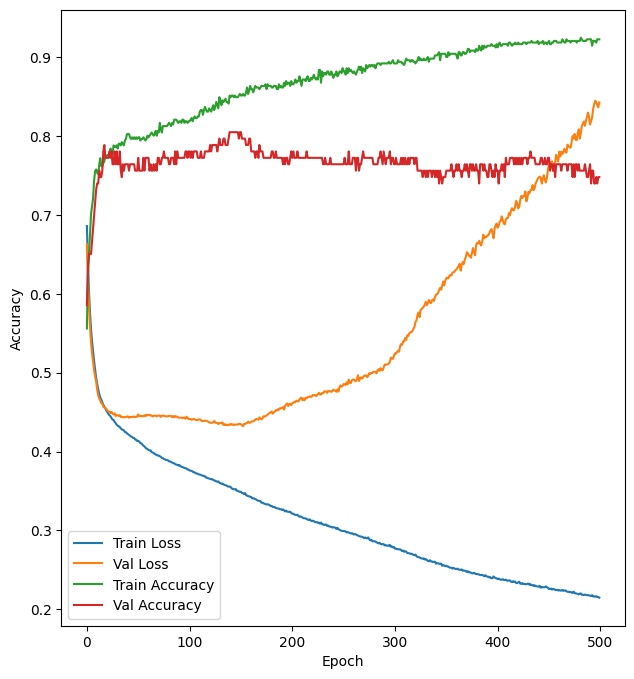

In [ ]:
plot_history(history)

In [ ]:
import matplotlib.pyplot as plt

def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch

  plt.figure(figsize=(16,8))
  plt.subplot(1,2,1)
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.plot(hist['epoch'], hist['loss'], label='Train Loss')
  plt.plot(hist['epoch'], hist['val_loss'], label='Val Loss')
  plt.legend()

  plt.subplot(1,2,2)
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.plot(hist['epoch'], hist['acc'], label='Train Accuracy')
  plt.plot(hist['epoch'], hist['val_acc'], label='Val Accuracy')
  plt.legend()

  plt.show()

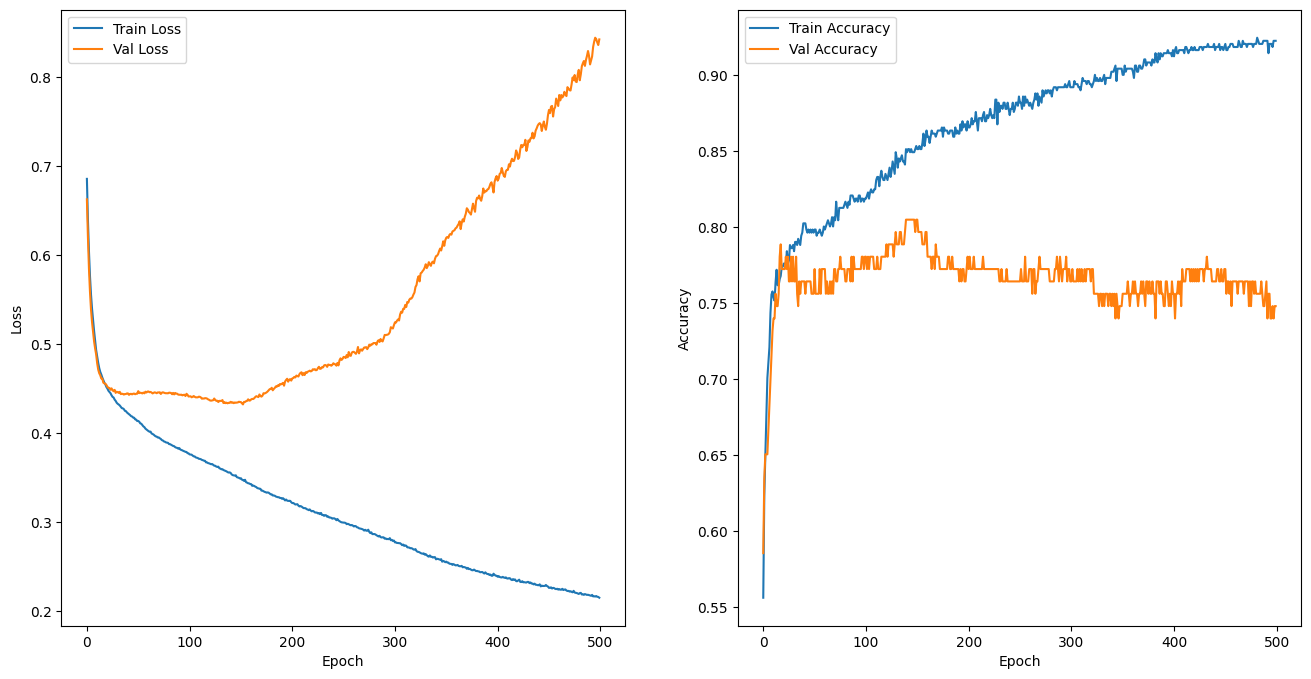

In [ ]:
plot_history(history)